Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

In [41]:
#importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [52]:
#reading the dataset

df=pd.read_csv("bank.csv",delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [54]:
df.shape
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<Axes: >

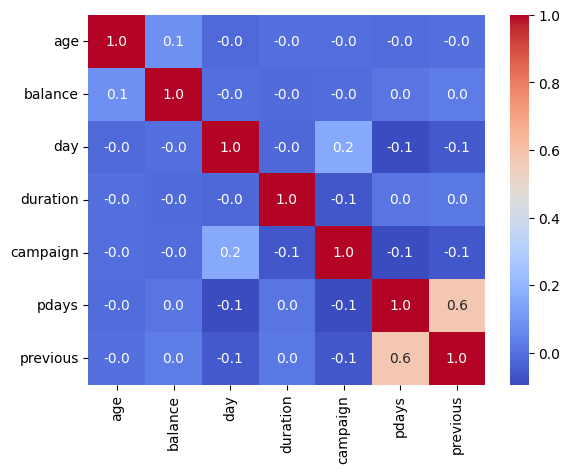

In [55]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='.1f')

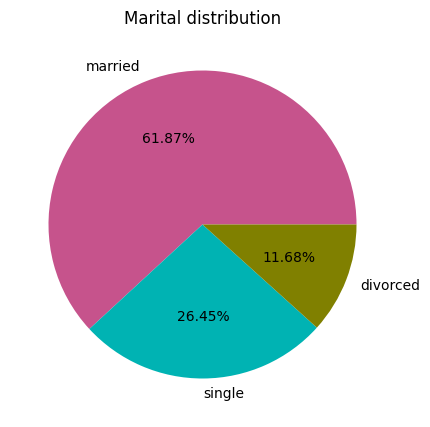

In [56]:
marital=df['marital'].value_counts().reset_index()
color=['#c6538c','#00b3b3','olive']
plt.figure(figsize=(7,5))
plt.title("Marital distribution")
plt.pie(marital['marital'],labels=marital['index'],autopct='%1.2f%%',colors=color)
plt.show()

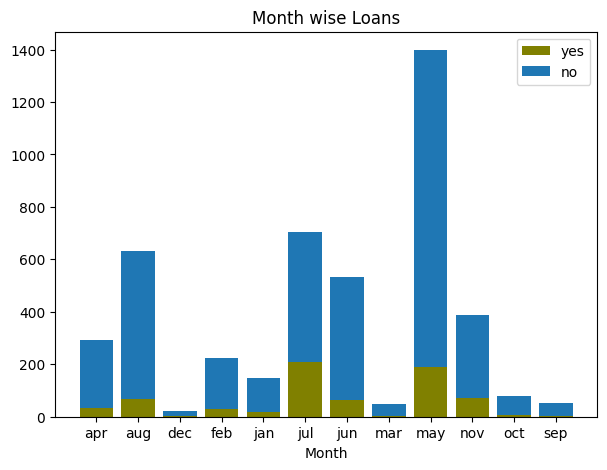

In [57]:
month=df.groupby(['month','loan']).size().reset_index()
month.rename(columns={0:'Count'},inplace=True)
month_yes=month[month['loan']=='yes']
month_no=month[month['loan']=='no']
plt.figure(figsize=(7,5))
plt.xlabel("Month")
plt.title("Month wise Loans")
plt.bar(month_yes['month'],month_yes['Count'],label='yes',color='olive')
plt.bar(month_no['month'],month_no['Count'],bottom=month_yes['Count'],label='no')
plt.legend()
plt.show()

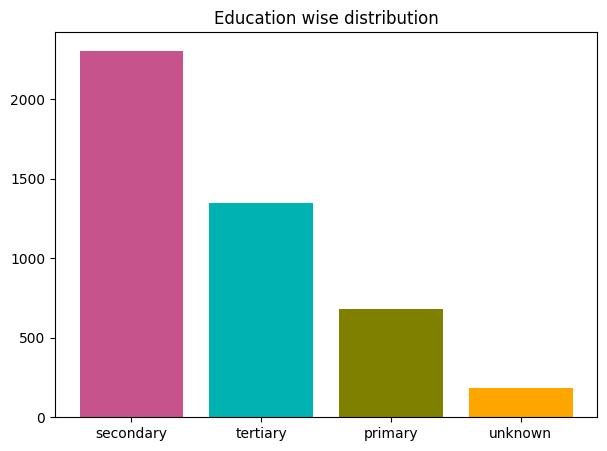

In [58]:
educ=df['education'].value_counts().reset_index()
color=['#c6538c','#00b3b3','olive','orange']
plt.figure(figsize=(7,5))
plt.title("Education wise distribution")
plt.bar(educ['index'],educ['education'],color=color)
plt.show()

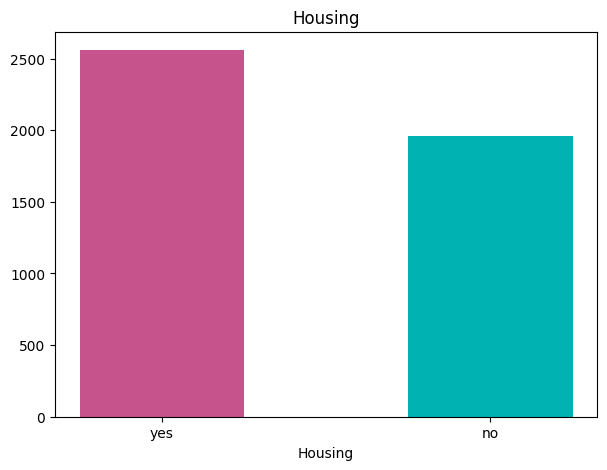

In [59]:
house=df['housing'].value_counts().reset_index()
color=['#c6538c','#00b3b3']
plt.figure(figsize=(7,5))
plt.xlabel("Housing")
plt.title("Housing")
plt.bar(house['index'],house['housing'],width=0.5,color=color)
plt.show()

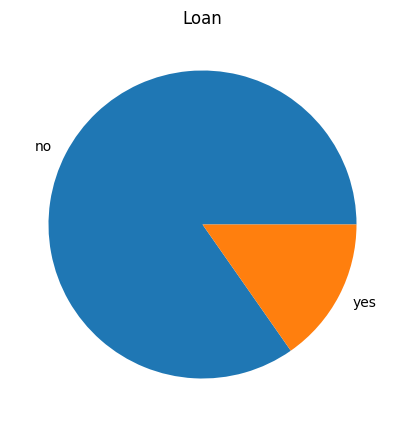

In [60]:
loan=df['loan'].value_counts().reset_index()
plt.figure(figsize=(7,5))
plt.title("Loan")
plt.pie(loan['loan'],labels=loan['index'])
plt.show()


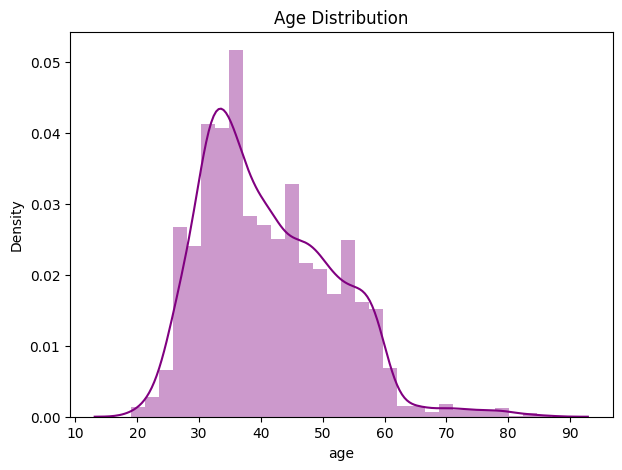

In [61]:
plt.figure(figsize=(7,5))
plt.title("Age Distribution")
sns.distplot(df['age'],hist=True,bins=30,color='purple')
plt.show()

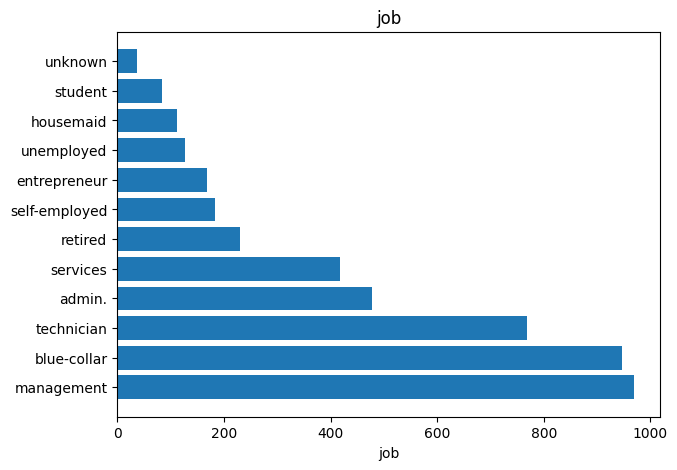

In [62]:
job=df['job'].value_counts().reset_index()
plt.figure(figsize=(7,5))
plt.xlabel("job")
plt.title("job")
plt.barh(job['index'],job['job'])
plt.show()

In [63]:
encoder=LabelEncoder()
df['job']=encoder.fit_transform(df['job'])
df['marital']=encoder.fit_transform(df['marital'])
df['education']=encoder.fit_transform(df['education'])
df['housing']=encoder.fit_transform(df['housing'])
df['loan']=encoder.fit_transform(df['loan'])
df['default']=encoder.fit_transform(df['default'])
df['contact']=encoder.fit_transform(df['contact'])
df['month']=encoder.fit_transform(df['month'])


In [76]:
x=df.drop('default',axis=1)
y=df['default']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)
x_train.shape,y_train.shape
x_test.shape,y_test.shape


((905, 16), (905,))

In [81]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [ ]:
print("accuracy_score=", accuracy_score(y_test,y_pred))